<IPython.core.display.Javascript object>

Image captured successfully!


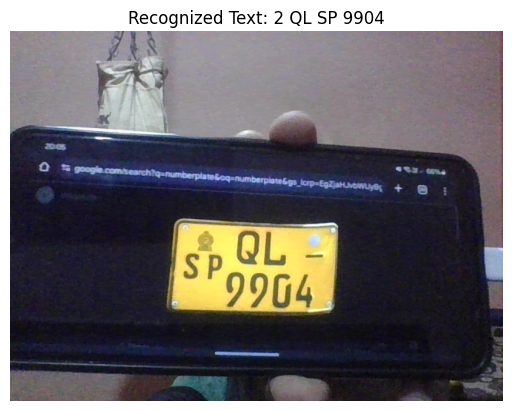

Recognized Text: 2 QL SP 9904
Vehicle identified with number plate: 2 QL SP 9904


In [7]:
!pip install easyocr
from google.colab import files
import cv2
import easyocr
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from matplotlib import pyplot as plt

def capture_image():
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const context = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            video.srcObject = stream;
            document.body.appendChild(video);
            await video.play();


            await new Promise((resolve) => {
                const captureButton = document.createElement('button');
                captureButton.textContent = 'Capture';
                captureButton.style.position = 'absolute';
                captureButton.style.top = '10px';
                captureButton.style.left = '10px';
                document.body.appendChild(captureButton);

                captureButton.onclick = () => {
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    context.drawImage(video, 0, 0);
                    stream.getTracks().forEach(track => track.stop());
                    video.remove();
                    captureButton.remove();
                    resolve();
                };
            });

            return canvas.toDataURL('image/png');
        }
        captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    binary = b64decode(data.split(',')[1])
    with open('captured_image.png', 'wb') as f:
        f.write(binary)
    return 'captured_image.png'


def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def perform_ocr_and_display(image_path):
    reader = easyocr.Reader(['en'])
    preprocessed_image = preprocess_image(image_path)
    result = reader.readtext(preprocessed_image)
    recognized_text = ' '.join(entry[1] for entry in result)

    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {recognized_text}")
    plt.axis('off')
    plt.show()

    return recognized_text

def interpret_number_plate(number_plate):
    if len(number_plate) >= 6:
        return f"Vehicle identified with number plate: {number_plate}"
    else:
        return "Unable to identify vehicle, invalid number plate."


image_path = capture_image()
print("Image captured successfully!")
recognized_text = perform_ocr_and_display(image_path)
print("Recognized Text:", recognized_text)

context = interpret_number_plate(recognized_text)
print(context)
